## Evaluation

Exercise 1: Extended Drift-Diffusion-Model

1.)
>Use euler-maruyama to run 5 simulations of a DDM - <span style="color:red">1/1</span><br>

2.)
>Run 200 trials for different $\mu$ and plot the percentage of "up" responses- <span style="color:red">1.5/2 *(With a = [1, -100] you will count trials as up responses than first cross the lower threshold a=-1 but then bounce back to a=+1.)*</span><br>
>Implement a solution for non-decisions - <span style="color:red">0/1</span><br>
>Double and halve the decision boundary $a$ - <span style="color:red">1/1</span><br>
>Discussion - <span style="color:red">0/2</span><br>

3.)
>Find a value $\mu$ with 70% "up" responses - <span style="color:red">1/1</span><br>
>Simulate 2000 trials - <span style="color:red">1/1</span><br>

4.)
>Plot the reaction time distribution for each of the two choices - <span style="color:red">2/2</span><br>
>Calculate mean for the two choices - <span style="color:red">2/2</span><br>
>Discuss the distributions - <span style="color:red">1/2 *(Discussion of the shape of the distribution missing. The expectation of lower reaction times would only be relevant if there was information on the actual task, but here we are looking at a qualitative model.)*</span><br>

5.)
>Implement noise in the drift - <span style="color:red">1/1</span><br>
>Find a distribution of the drift value that results in 70% "up" responses - <span style="color:red">1/1</span><br>
>Calculate mean - <span style="color:red">1/1</span><br>
>Plot reaction times - <span style="color:red">1/1</span><br>
>Discuss your choice of parameters and results - <span style="color:red">1/1</span><br>

Total <span style="color:red">15.5/20</span><br>

# Exercise 5: Decision Making I
### Lukas Dippold and Evert de Man

#### 1: Extended drift-diffusion model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

##### (1)

In [2]:
# Edited Euler-Maruyama function that also returns the end time and result
#(when the decision boundary is reached).

def euler_maruyama(f_func, g_func, x_0, t, dt, a):
    y = np.zeros(len(t))
    for i, t_val in enumerate(t):
        if t_val == 0:
            y[i] = x_0
        else:
            W = np.random.standard_normal(1)
            y[i] = (y[i-1] + f_func(y[i-1], t_val) * dt 
                        + g_func(y[i-1], t_val) * np.sqrt(dt) * W)
            if y[i] > a[0]:
                result = 1
                break
            if y[i] < a[1]:
                result = -1
                break
            result = 0
    return y, i*dt, result

In [3]:
# Initialization
sigma = 0.5
mu = 0.2
X_0 = 0
dt = 0.01
t_max = 10
ts = np.arange(0, t_max + dt, dt)
it = 5

def ffunc(x, t):
    return mu

def gfunc(x, t):
    return sigma

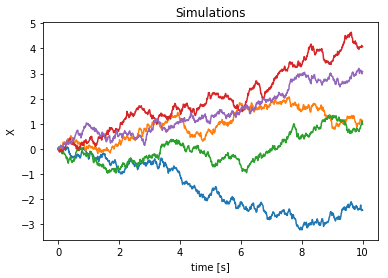

In [4]:
for _ in range(it):
    y, end_time, result = euler_maruyama(ffunc, gfunc, X_0, ts, dt, [100, -100])
    plt.plot(ts, y)

plt.xlabel("time [s]")
plt.ylabel("X")
plt.title("Simulations")
plt.show()

##### (2)

In [5]:
def check_up(a, mu_values, no_trials = 200):
    perc_ups = np.zeros(len(mu_values))
    
    for i, mu in enumerate(mu_values):
        
        def ffunc(x, t):
            return mu
        up_or_not = np.zeros(no_trials)
        
        for j in range(no_trials):
            X, end_time, result = euler_maruyama(ffunc, gfunc, X_0, ts, dt, [a, -100])
            if result == 1:
                up_or_not[j] = 1
        perc_ups[i] = np.sum(up_or_not) / no_trials * 100
        
    return perc_ups

In [6]:
# Initialization
sigma = 0.5
X_0 = 0
mu_values = [-0.1, 0, 0.1, 0.2, 0.5]
a_values = [1, 2, 0.5]
dt = 0.01
t_max = 10
ts = np.arange(0, t_max + dt, dt)

def ffunc(x, t):
    return mu

def gfunc(x, t):
    return sigma

In [7]:
# Calculate all values
X = np.zeros([len(a_values), len(mu_values)])

for i, a in enumerate(a_values):
    X[i, :] = check_up(a, mu_values, no_trials = 200)

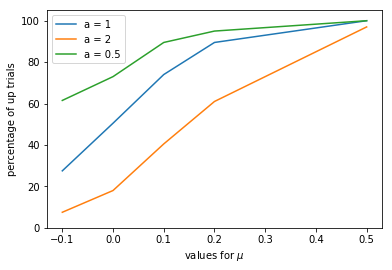

In [8]:
# Plot the results for all mu and a values

for i, a in enumerate(a_values):
    plt.plot(mu_values, X[i, :], label = "a = " + str(a))

plt.legend()
plt.xlabel(r"values for $\mu$")
plt.ylabel("percentage of up trials")
plt.ylim([0, 105])
plt.show()

##### (3)

In [9]:
# From task (2) we know: If we say a = 1, then 70% gives a mu of about 0.12

# Initialization
sigma = 0.5
X_0 = 0
mu = 0.12
a = [1, -1]
dt = 0.01
t_max = 10
ts = np.arange(0, t_max + dt, dt)
no_trials = 2000

def ffunc(x, t):
    return mu

def gfunc(x, t):
    return sigma

end_times = np.zeros(no_trials)
results = np.zeros(no_trials)

for i in range(no_trials):
    _, end_times[i], results[i] = euler_maruyama(ffunc, gfunc, X_0, ts, dt, a)

##### (4)

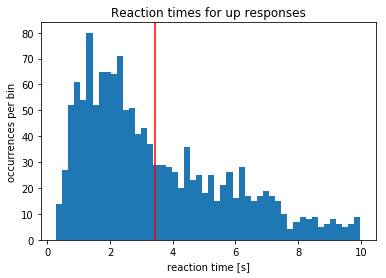

The mean reaction time for up responses is 3.45 seconds.


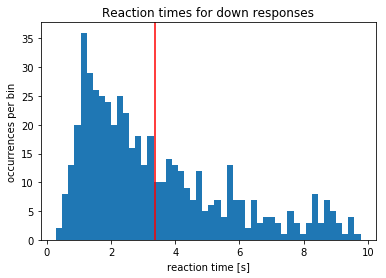

The mean reaction time for down responses is 3.37 seconds.


In [10]:
end_times_up = end_times[results == 1]
plt.hist(end_times_up, 50)
plt.title("Reaction times for up responses")
plt.xlabel("reaction time [s]")
plt.ylabel("occurrences per bin")
mean_up_time = round(np.mean(end_times_up)*100)/100
plt.axvline(mean_up_time,color='red')
plt.show()
print("The mean reaction time for up responses is " + str(mean_up_time) + " seconds.")

end_times_down = end_times[results == -1]
plt.hist(end_times_down, 50)
plt.title("Reaction times for down responses")
plt.xlabel("reaction time [s]")
plt.ylabel("occurrences per bin")
mean_down_time = round(np.mean(end_times_down)*100)/100
plt.axvline(mean_down_time,color='red')
plt.show()
print("The mean reaction time for down responses is " + str(mean_down_time) + " seconds.")

It makes sense that both reaction times histograms have a similar shape and mean.
The means are quite high. we would expect a lower reaction time for both. over 3 seconds in the mean seem long for modeling behaviour. 

##### (5)

for the random dot motion task in the lecture we have a mean reaction time of around 800 ms for a 70 % "up"-rate.
so we aim for accuracy of 70 % up and a reaction time of around 800 ms to fit our results with the experimental results with humans. We did that by trying several $m_\mu$ and $s_\mu$ values. a good fit we found is shown below

In [11]:
# Initialization
X_0 = 0
sigma = 0.5
a = [1, -1]
dt = 0.01
t_max = 10
ts = np.arange(0, t_max + dt, dt)
no_trials = 2000

def ffunc(x, t):
    return np.random.normal(m_, s_)

def gfunc(x, t):
    return sigma

m_values = np.arange(-0.1, 0.5, 0.1)
s_values = np.arange(0, 1, 0.1)

mu_values = np.zeros([3, len(m_values)*len(s_values)])

k = 0
for m_ in m_values:
    for s_ in s_values:
        mu_values[0, k] = m_
        mu_values[1, k] = s_
        k = k + 1

up-rate:  0.698

The mean reaction time for up responses is 0.8 seconds.


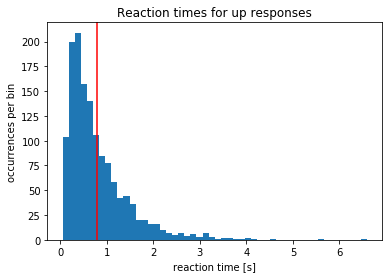

The mean reaction time for down responses is 0.85 seconds.


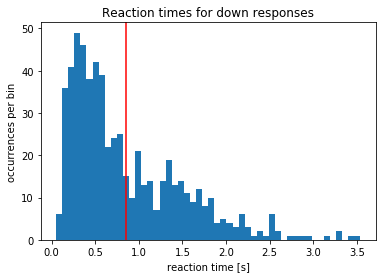

In [12]:
end_times = np.zeros(no_trials)
results = np.zeros(no_trials)

m_= 0.51
s_= 10.34

for i in range(no_trials):
    _, end_times[i], results[i] = euler_maruyama(ffunc, gfunc, X_0, ts, dt, a)



end_times_up = end_times[results == 1]
mean_up_time = round(np.mean(end_times_up)*100)/100

end_times_down = end_times[results == -1]
mean_down_time = round(np.mean(end_times_down)*100)/100

urate = len(end_times_up)/ (len(end_times_up)+len(end_times_down))
print("up-rate: ",urate)

print("\nThe mean reaction time for up responses is " + str(mean_up_time) + " seconds.")

plt.hist(end_times_up, 50)
plt.title("Reaction times for up responses")
plt.xlabel("reaction time [s]")
plt.ylabel("occurrences per bin")
plt.axvline(mean_up_time,color='red')
plt.show()


print("The mean reaction time for down responses is " + str(mean_down_time) + " seconds.")

plt.hist(end_times_down, 50)
plt.title("Reaction times for down responses")
plt.xlabel("reaction time [s]")
plt.ylabel("occurrences per bin")
plt.axvline(mean_down_time,color='red')
plt.show()


With a values $m_\mu = 0.51$ and $s_\mu = 10.31$ we can fit the experimental results quite good.